In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

In [6]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = web.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7013 entries, 1995-01-03 to 2022-11-07
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7013 non-null   float64
 1   MSFT    7013 non-null   float64
 2   F       7013 non-null   float64
 3   GE      7013 non-null   float64
dtypes: float64(4)
memory usage: 273.9 KB


In [8]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.820027,2.359439,4.264752,32.767975
1995-01-04,7.757342,2.376590,4.379499,32.767975
1995-01-05,7.647642,2.337388,4.341251,32.848270
1995-01-06,7.663311,2.376590,4.341251,32.687660
1995-01-09,7.631971,2.361889,4.417747,32.366394


In [9]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-11-01,134.880005,228.169998,13.400,78.209999
2022-11-02,132.940002,220.100006,13.060,77.400002
2022-11-03,132.029999,214.250000,13.260,78.379997
2022-11-04,134.440002,221.389999,13.510,81.070000
2022-11-07,135.610001,223.690002,13.655,82.279999


In [10]:
mydata.iloc[0]

PG       7.820027
MSFT     2.359439
F        4.264752
GE      32.767975
Name: 1995-01-03 00:00:00, dtype: float64

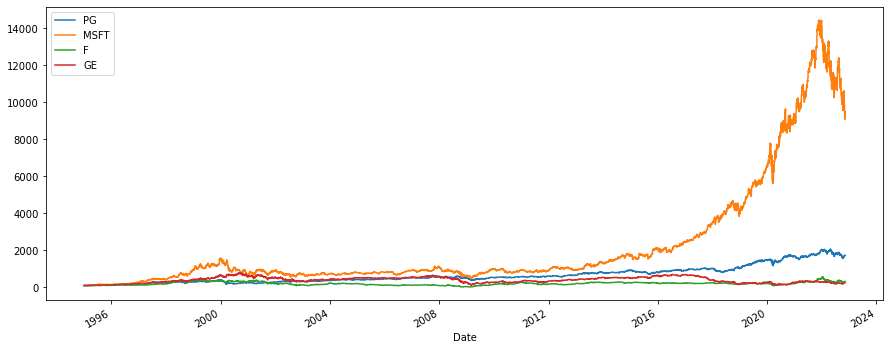

In [11]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

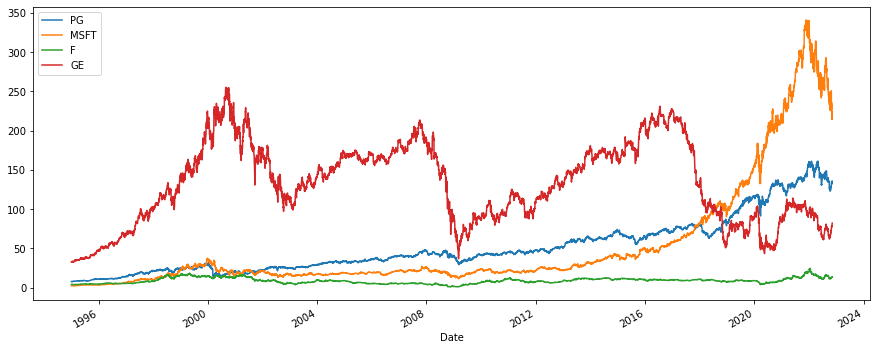

In [12]:
mydata.plot(figsize=(15, 6))
plt.show()

In [14]:
mydata.loc['1995-01-03']

PG       7.820027
MSFT     2.359439
F        4.264752
GE      32.767975
Name: 1995-01-03 00:00:00, dtype: float64

In [18]:
mydata.iloc[-1]

PG      135.610001
MSFT    223.690002
F        13.655000
GE       82.279999
Name: 2022-11-07 00:00:00, dtype: float64

In [19]:
retorno = (mydata / mydata.shift(1)) - 1
retorno.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002450
1995-01-06,0.002049,0.016772,0.000000,-0.004889
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [20]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [21]:
np.dot(retorno, weights)

array([        nan,  0.0065398 , -0.00922991, ..., -0.00136218,
        0.02618818,  0.01118745])

In [22]:
retorno_anual = retorno.mean() * 250
retorno_anual

PG      0.126809
MSFT    0.211649
F       0.122678
GE      0.084529
dtype: float64

In [23]:
np.dot(retorno_anual, weights)

0.13641643867686562

In [30]:
pfolio_1 = f'{np.dot(retorno_anual, weights) * 100:.3f}%'
print(pfolio_1)

13.642%


In [33]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [36]:
pfolio_2 = f'{np.dot(retorno_anual, weights_2) * 100:.3f}%'
print(pfolio_1)
print(pfolio_2)

13.642%
15.801%
